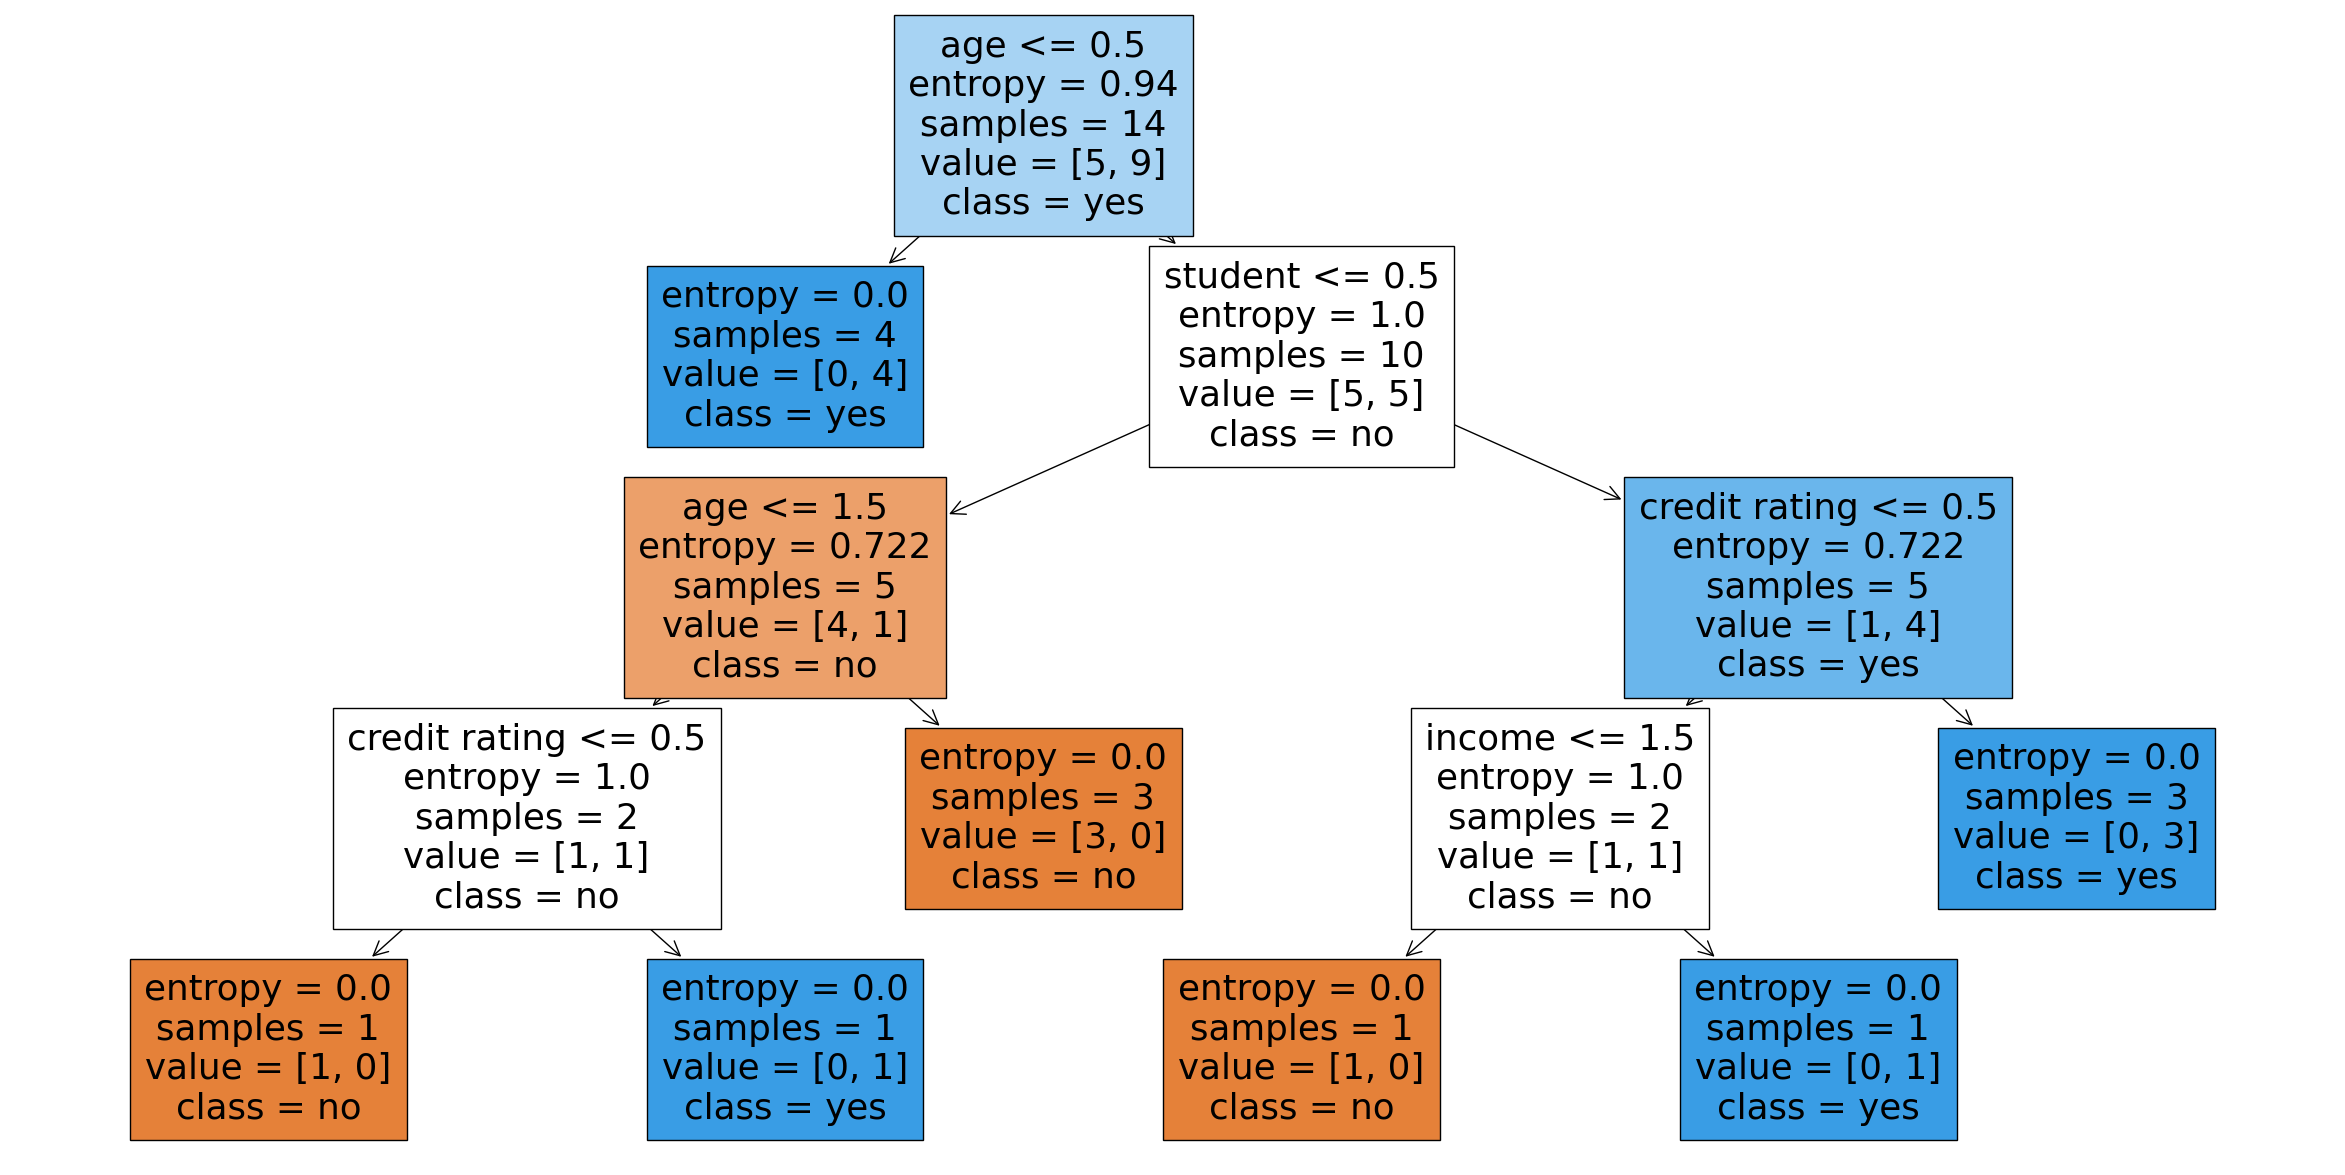

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data={
    'age':['youth','youth','middle','senior','senior','senior','middle','youth','youth','senior','youth','middle','middle','senior'],
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
    'buys computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
}
df=pd.DataFrame(data)
le_age=LabelEncoder()
le_income=LabelEncoder()
le_student=LabelEncoder()
le_credit=LabelEncoder()
le_label=LabelEncoder()

df['age_encoded']=le_age.fit_transform(df['age'])
df['income_encoded']=le_income.fit_transform(df['income'])
df['student_encoded']=le_student.fit_transform(df['student'])
df['credit_rating_encoded']=le_credit.fit_transform(df['credit rating'])
df['buys_computer_encoded']=le_label.fit_transform(df['buys computer'])

x=df[['age_encoded','income_encoded','student_encoded','credit_rating_encoded']]
y=df['buys_computer_encoded']

clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x,y)

plt.figure(figsize=(30,15))
plot_tree(clf,
         feature_names=['age','income','student','credit rating'],
          class_names=le_label.classes_,
          filled=True   
         )
plt.show()

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Sample data
data = {
    'age': ['youth', 'youth', 'middle', 'senior', 'senior', 'senior', 'middle', 'youth', 'youth', 'senior', 'youth', 'middle', 'middle', 'senior'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'buys computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)

# Convert categorical variables to numerical values
label_encoders = {}
for column in ['age', 'income', 'student', 'buys computer']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df[['age', 'income', 'student']]
y = df['buys computer']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Export and print the decision tree rules
tree_rules = export_text(clf, feature_names=['age', 'income', 'student'])
print("Decision tree rules \n", tree_rules)


Decision tree rules 
 |--- age <= 0.50
|   |--- class: 1
|--- age >  0.50
|   |--- student <= 0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: 0
|   |   |--- age >  1.50
|   |   |   |--- class: 0
|   |--- student >  0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: 0
|   |   |--- age >  1.50
|   |   |   |--- class: 1



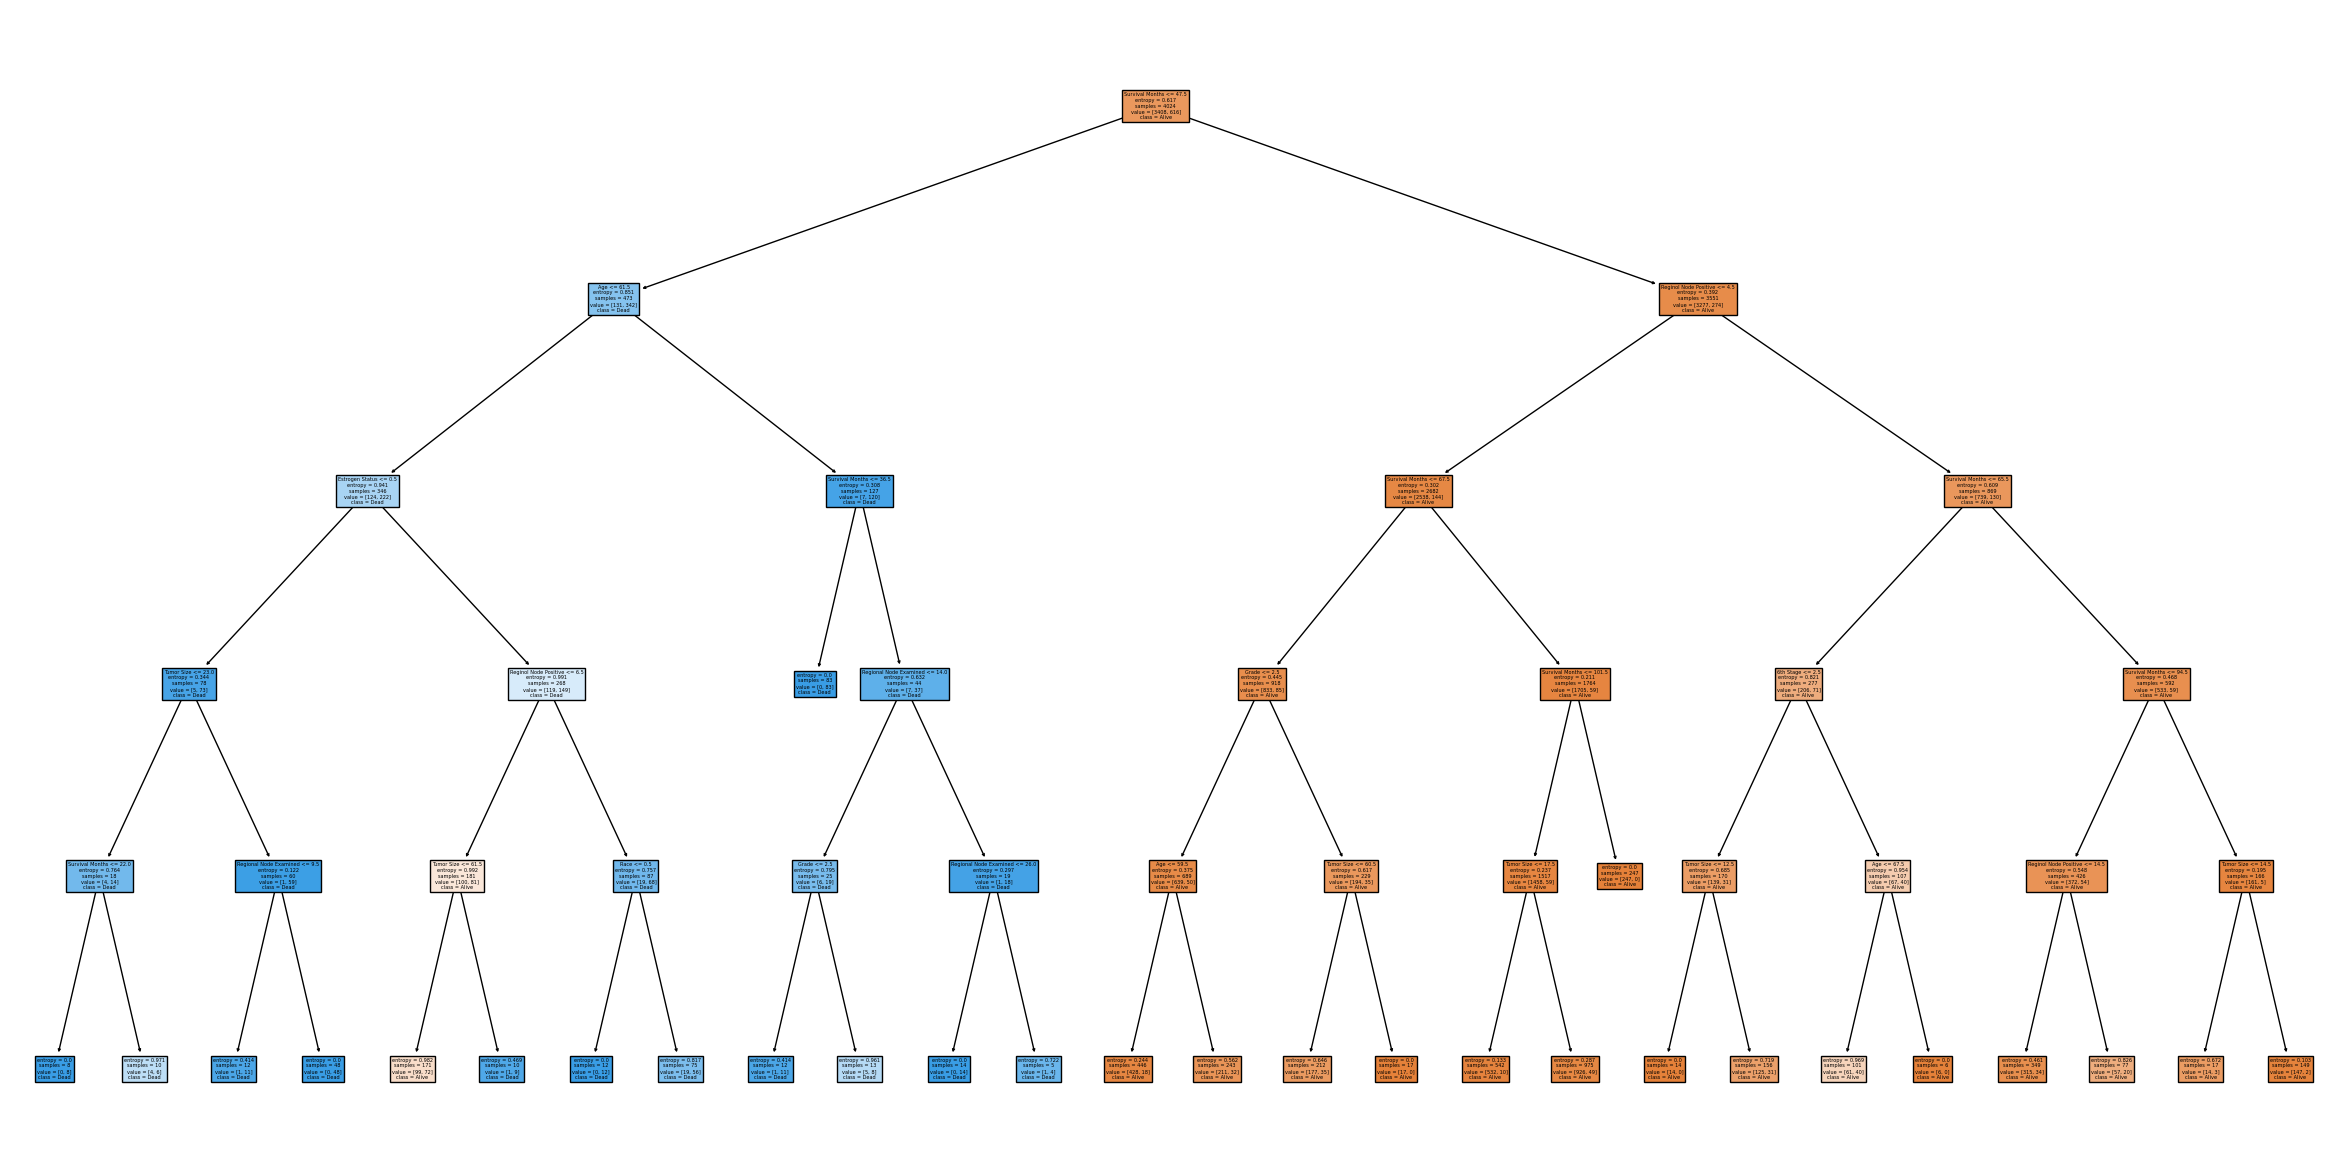

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
file_path = 'Breast_Cancer.csv'
data = pd.read_csv(file_path)
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=42)
clf.fit(X, y)
plt.figure(figsize=(30, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True)
plt.show()
#overfiting

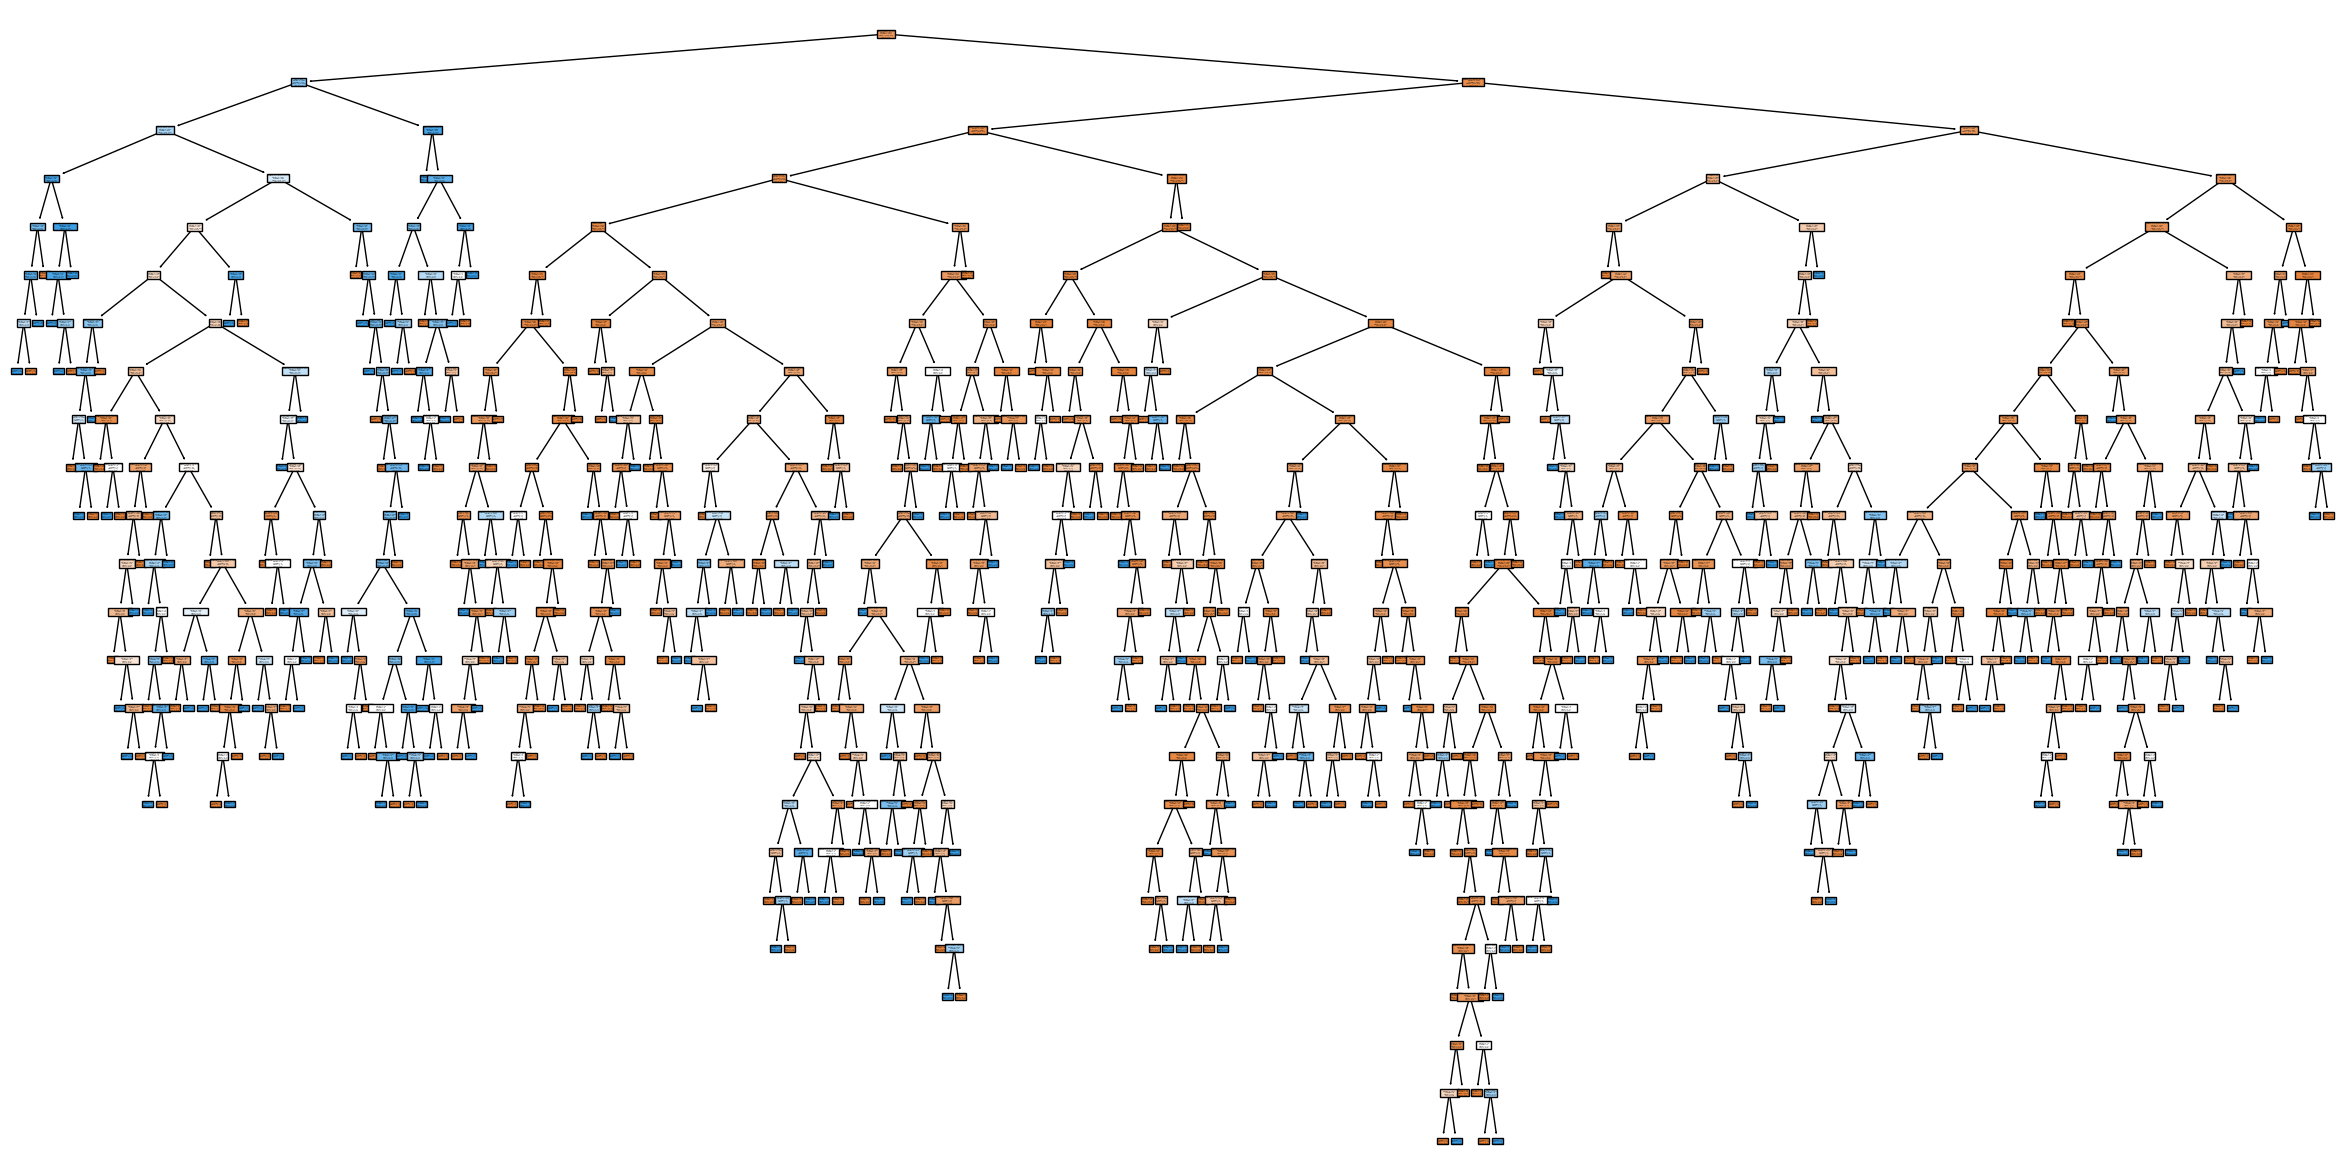

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
file_path = 'Breast_Cancer.csv'
data = pd.read_csv(file_path)
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)
plt.figure(figsize=(30, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True)
plt.savefig('decision_tree.png')
plt.show()
